3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


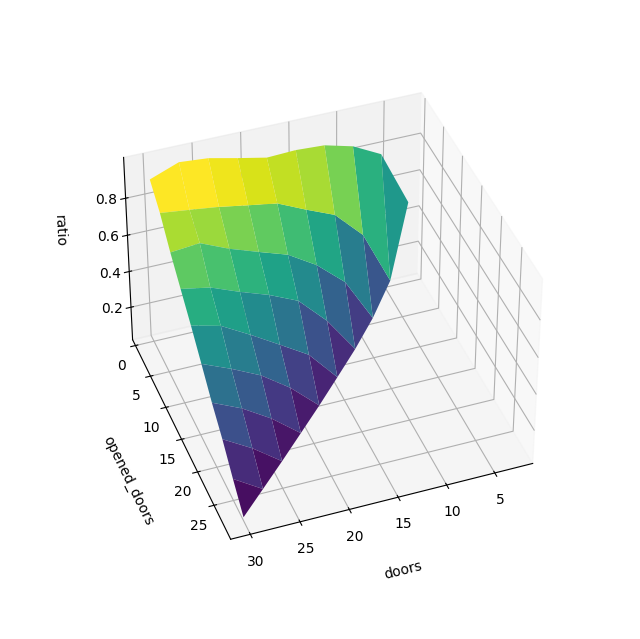

In [52]:
#W2-3 but with graph and big cycles
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.interpolate as interp
from mpl_toolkits.mplot3d import Axes3D



number_of_doors = 30     #n>3    the program goes as n^2 times the number of tries
tries = 100000

x = []      #number of doors
y = []      #number of opened_doors
z = []      #ratio between switcher and keeper

for p in range(3, number_of_doors + 1):     #start from 3 doors so 0, 1 and 2
    print(p)
    number_of_opened_doors = p - 2
    
    for j in range(1, number_of_opened_doors + 1):

        x.append(p)
        y.append(j)
        switcher_score = 0
        keeper_score = 0

        for l in range(tries):

            doors = np.tile(np.arange(p), (4, 1))     #instead of storing the open/close goat/win chosen/unchosen information in different arrays, we store it as value in a matrix

            for i in range(p):
                doors[1][i] = "0"           #0 = goat
                doors[2][i] = "1"           #0 = closed, I start with open because it's easier to close the doors
                doors[3][i] = "0"           #0 = unchosen

    
            number_of_closed_doors = p - j       #changes every time

            winning_door = np.random.randint(0, p)
            doors[1][winning_door] = 1          #set the winning door
            doors[2][winning_door] = 0          #close the winning door

            chosen_door = np.random.randint(0, p)
            doors[3][chosen_door] = 1       #set the chosen door
            doors[2][chosen_door] = 0          #close the chosen door

            k=2     #records the number of closed doors
            if winning_door == chosen_door:
                k = 1


            for i in range(p):
                if k == number_of_closed_doors:
                    break
                if i == chosen_door or i == winning_door:        #don't want to count the already closed doors
                    continue 
       
                doors[2][i] = 0
                k = k + 1

        

            keeper = doors[0][chosen_door]
            doors[2][chosen_door] = 1       #open the door so that the switcher doesn't see it
            switcher = np.nonzero(doors[2] == 0)[0][np.random.randint(0,number_of_closed_doors-1)]    #select a random door from the closed ones (note that doors[2] == 0 returns TRUE when the door is closed)
            doors[2][chosen_door] = 0       #reclose the chosen door
            
            if keeper == winning_door:
                keeper_score = keeper_score + 1

            if switcher == winning_door:
                switcher_score = switcher_score + 1

        ratio = float(keeper_score/switcher_score)
        z.append(ratio)

plotx,ploty, = np.meshgrid(np.linspace(np.min(x),np.max(x),10),np.linspace(np.min(y),np.max(y),10))
plotz = interp.griddata((x,y),z,(plotx,ploty),method='linear')

fig = plt.figure(figsize = (8,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plotx, ploty, plotz, cstride=1, rstride=1, cmap='viridis')
ax.set_xlabel('doors', labelpad=20)
ax.set_ylabel('opened_doors', labelpad=20)
ax.set_zlabel('ratio', labelpad=20)
ax.view_init(40, 70)
ax.set_box_aspect(aspect=None, zoom=0.8)
#print(x , y, z)


